In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['font.family'] = 'serif'

In [4]:
sim_data = np.load('sim_data_new.npy')

In [5]:
def prepare_data(sim_data, scenario, data_idx):
    length = 500
    start = data_idx * length * 4 + scenario * length
    end = start + length
    X = np.asarray(sim_data[start:end, :10])
    Y = np.asarray(sim_data[start:end, 10:65])
    F = np.asarray(sim_data[start:end, 65:69])
    return X, Y, F

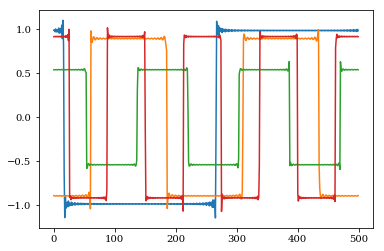

In [6]:
X, Y, F = prepare_data(sim_data, 0, 0)
plt.plot(F[:, 0])
plt.plot(F[:, 1])
plt.plot(F[:, 2])
plt.plot(F[:, 3])
plt.show()

In [7]:
from scipy.linalg import logm

In [8]:
def sliding_window(time_series, size=50, stride=1):
    """
    Calculate sliding window covariance Log-Euclidean vector time series.
    
    Args
        time_series: (numpy array) [t, n] t observations in time of n dimensional data
        size: (int) sliding window size
        stride: (int) sliding step size
    """
    t, n = X.shape
    #cov_series = np.zeros((t - size, n, n))
    log_series = np.zeros((t - size, int(0.5 * n * (n + 1))))
    for i in range(t - size):
        sliding_window = time_series[(i * stride):(i * stride + size), :]
        cov = np.cov(sliding_window, rowvar=False)
        #cov_series[i, :, :] = cov
        log_series[i, :] = logm(cov)[np.triu_indices(n)]
    return log_series

In [9]:
from sklearn.decomposition import PCA
from statsmodels.tsa.api import VAR

In [11]:
def SW_PCA_VAR(X, Y, ws=50, r=2):
    log_series_hat = sliding_window(X, ws)
    pca = PCA(n_components=r)
    components = pca.fit_transform(log_series_hat)
    model = VAR(components)
    results = model.fit(2)
    fitted_components = np.zeros(components.shape)
    fitted_components[:2, :] = components[:2, :]
    fitted_components[2:, :] = results.fittedvalues
    Y_hat = pca.inverse_transform(fitted_components)
    return fitted_components, Y_hat

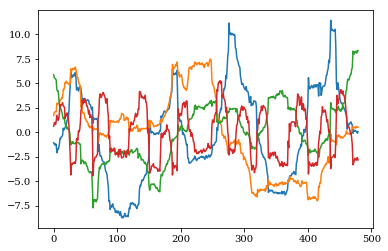

0.4711938762777603


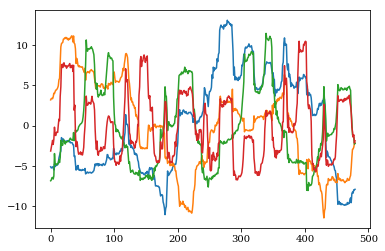

1.7464258760484592


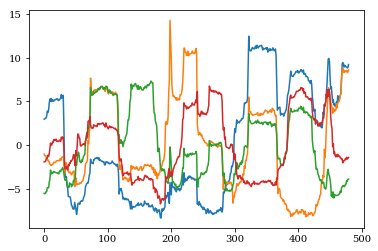

0.7575726036955323


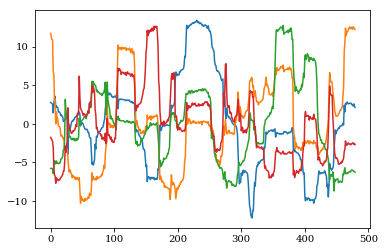

2.4252003362548495


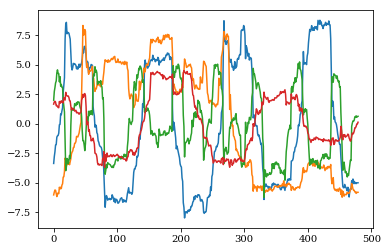

0.5399071746025331


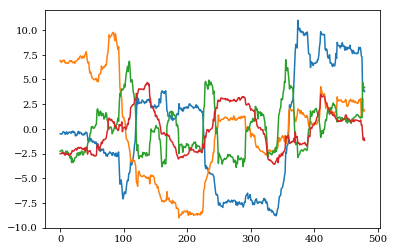

0.27242828391042423


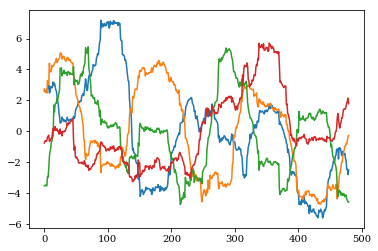

0.10623144939682243


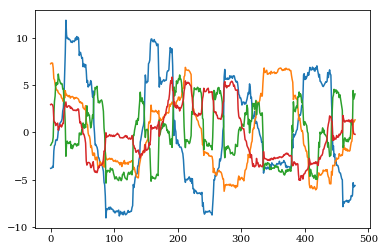

0.6630142504657859


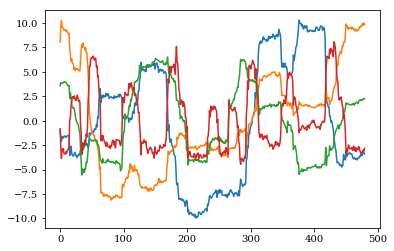

0.5848947971514381


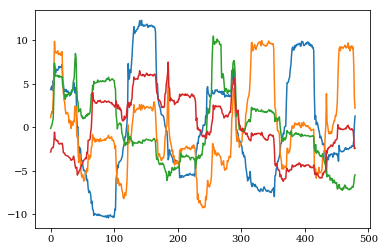

0.9640147000940585


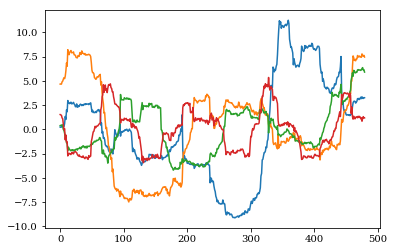

0.27469354680006797


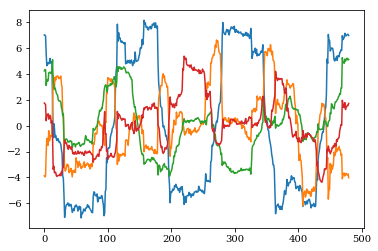

0.34334727024070877


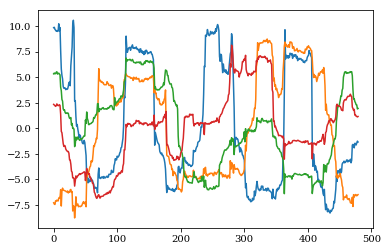

0.7475979811295966


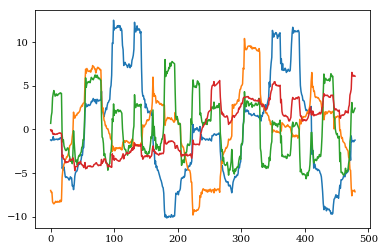

0.9645027467673863


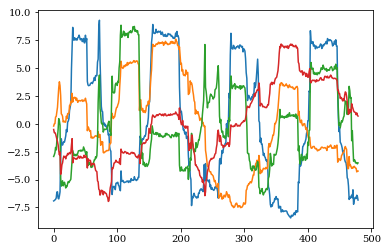

0.6947695865348023


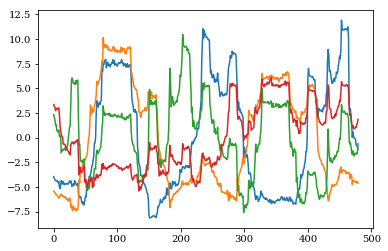

0.7706609711508696


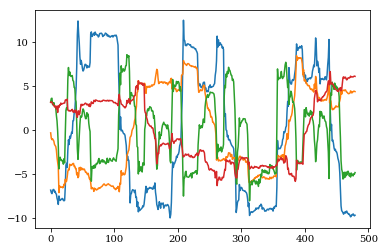

1.301339080916691


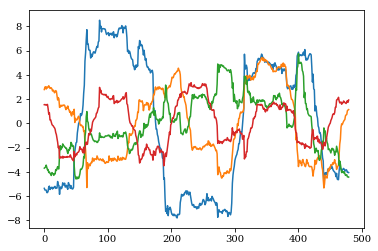

0.17873419125154855


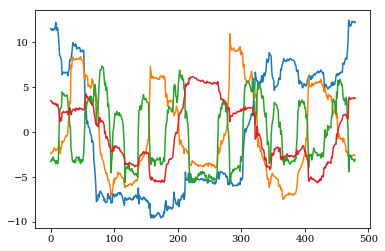

0.9020789250902593


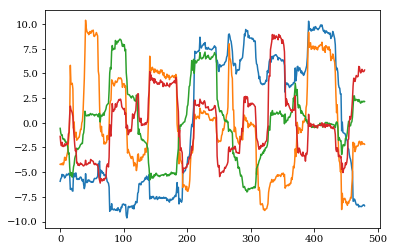

1.0780251723896965


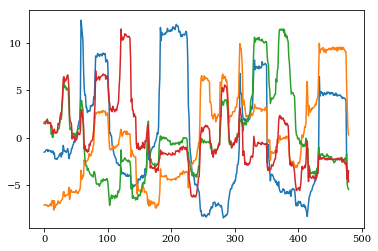

1.0976726496361082


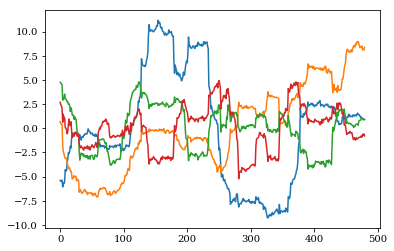

0.32186015479273766


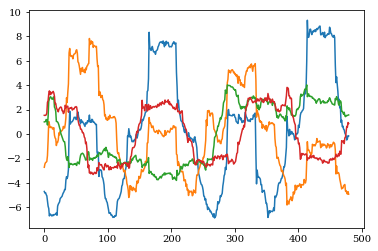

0.19287329674765286


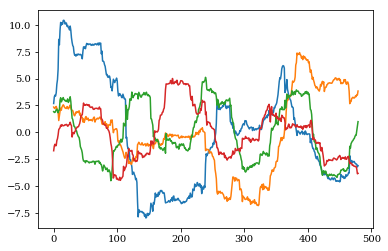

0.1640448247662243


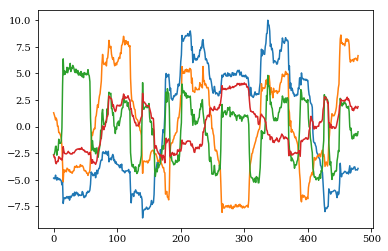

0.524760214028566


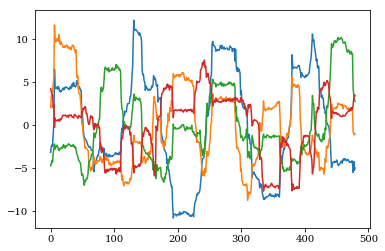

0.919751739914465


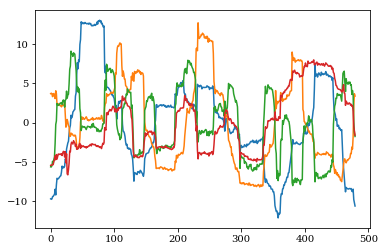

1.651720895489228


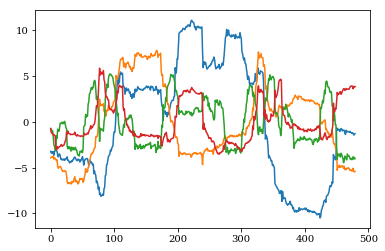

0.4037028339932332


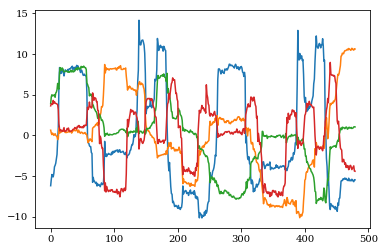

1.2887650742577976


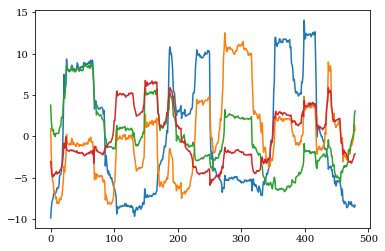

1.037438252719911


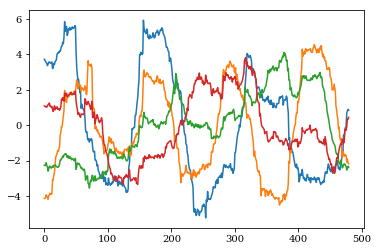

0.07563912054131534


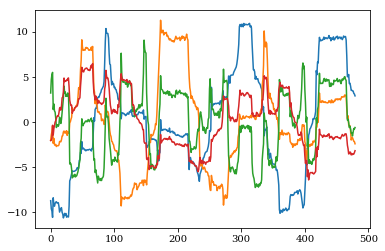

0.924622123762566


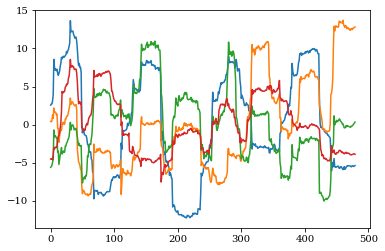

1.7178640960863838


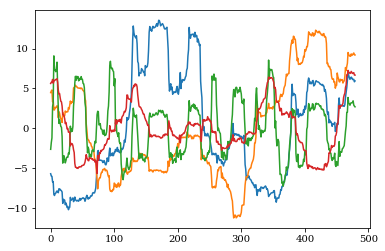

1.348830023338349


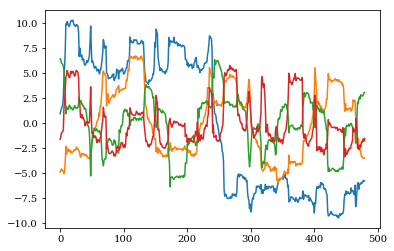

0.6140977767681953


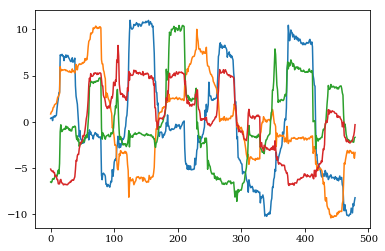

1.1705432918103067


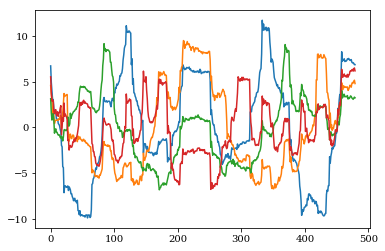

0.7204419622153512


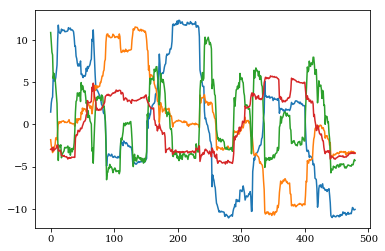

1.0004823621771939


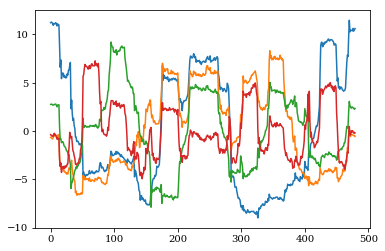

0.6909062069753137


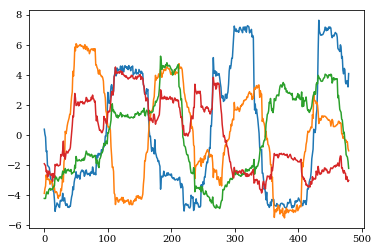

0.1957708768337989


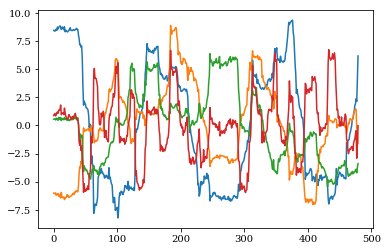

0.6559615809003024


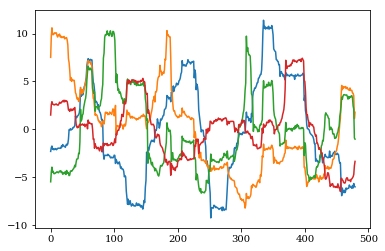

0.48936069401422705


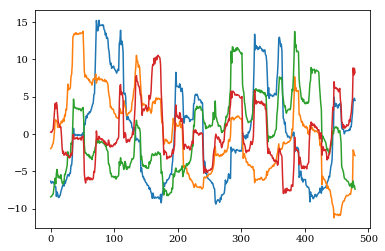

1.819349433311693


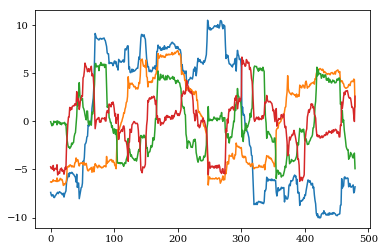

0.6093120721159391


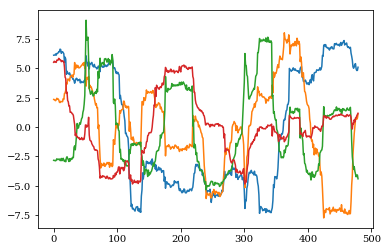

0.3898290578909319


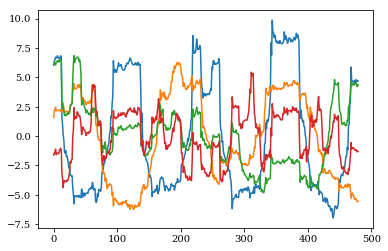

0.4062680224339063


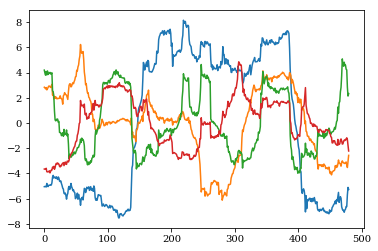

0.17859715017305286


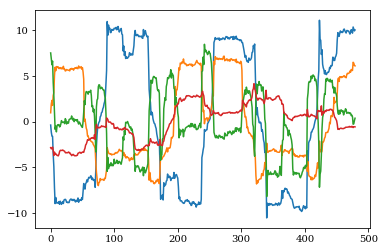

0.7363356757242145


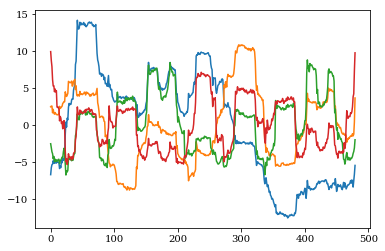

0.9239443813733105


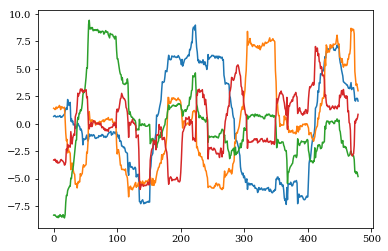

0.39860849826166694


In [13]:
square_mse = np.zeros(50)
for i in range(50):
    X, Y, F = prepare_data(sim_data, 0, i)
    fitted_components, Y_hat = SW_PCA_VAR(X, Y, 20, 4)
    for j in range(4):
        plt.plot(fitted_components[:, j])
    plt.show()
    total = Y_hat.shape[0]
    start = 10
    mse = np.mean((Y[start:(start + total), :] - Y_hat) ** 2)
    square_mse[i] = mse
    print(mse)

In [19]:
print(np.median(square_mse))
print(np.mean(square_mse))
print(np.std(square_mse))

0.6928378967550579
0.7691197432644646
0.4997947722586054


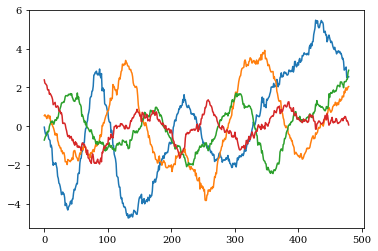

0.030521390992980433


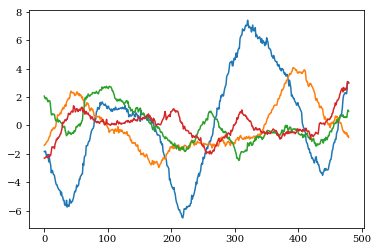

0.02654863787816594


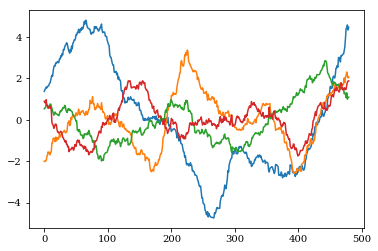

0.026229294809629232


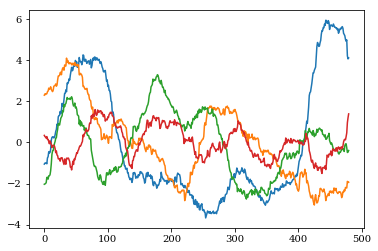

0.03057438294994709


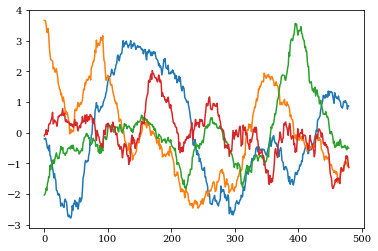

0.026710976737776795


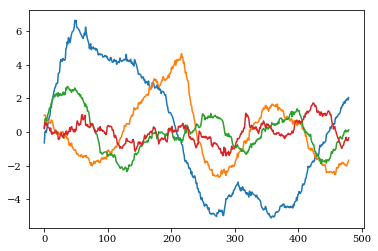

0.03392505816339374


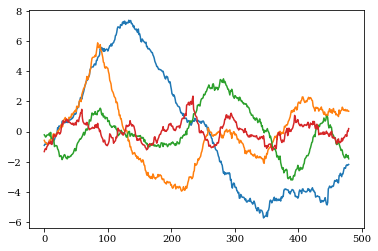

0.0532740518074807


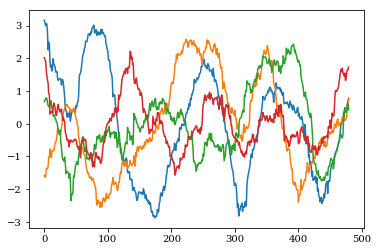

0.03259475172430668


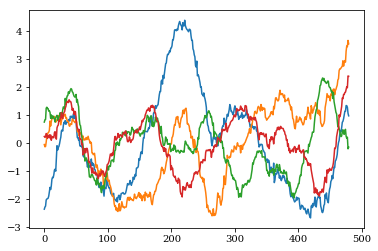

0.030565482202966263


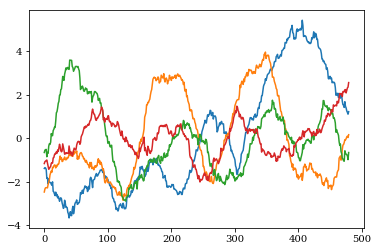

0.0349542585442427


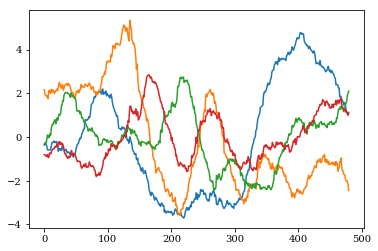

0.03200370775037776


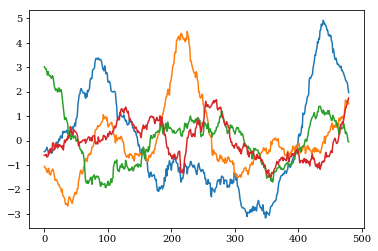

0.035819287989352896


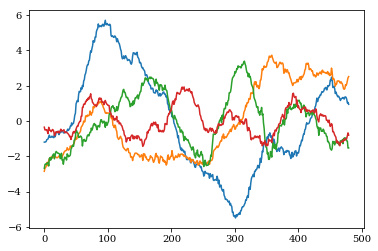

0.045993801824636645


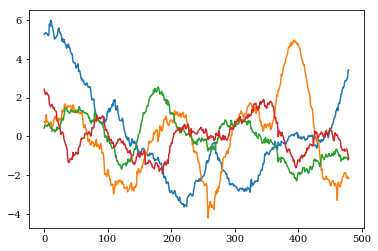

0.04035587280705791


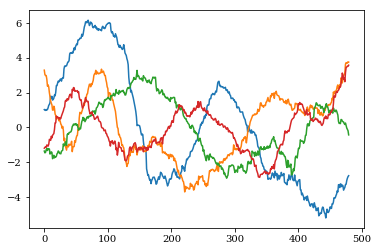

0.04997408743106699


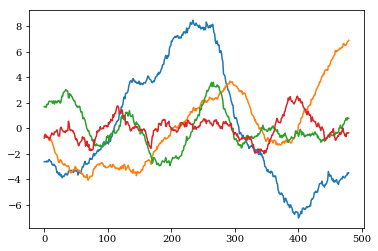

0.06005541056079359


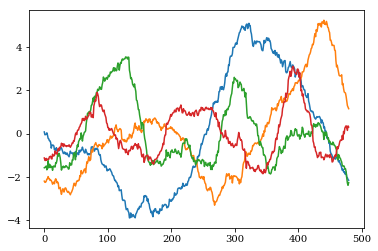

0.03180035064361969


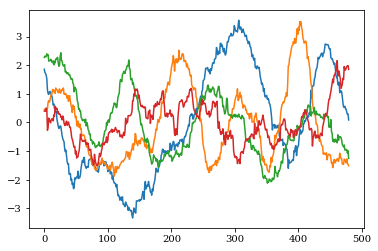

0.03820647563713693


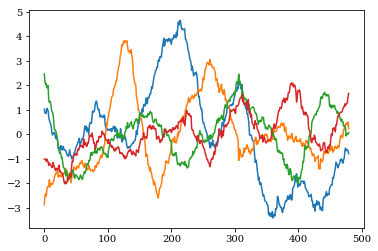

0.04061808736462872


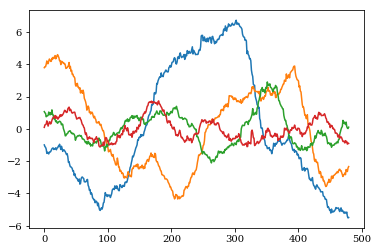

0.029392832021392323


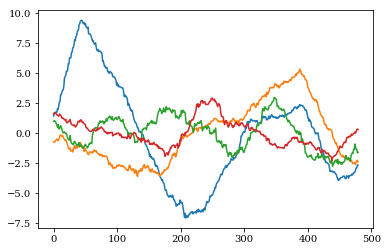

0.09639131870754312


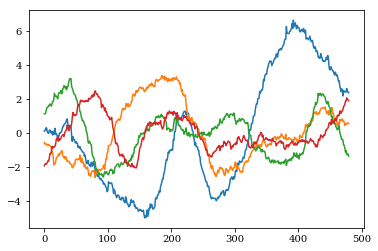

0.034795201553180354


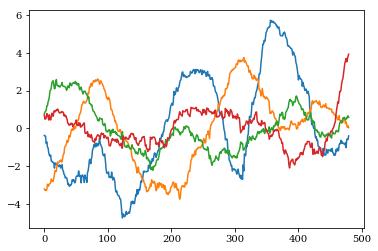

0.029328527547056314


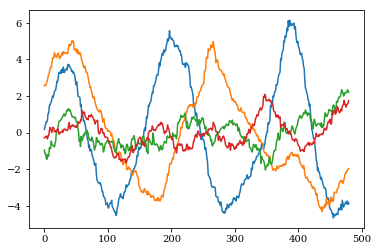

0.049025448328275496


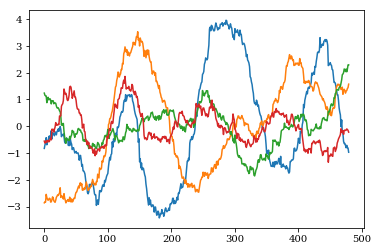

0.030103448905829184


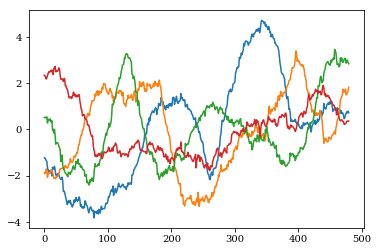

0.03305997887578026


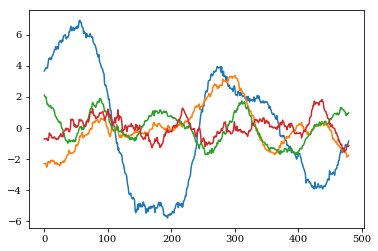

0.024414533701043704


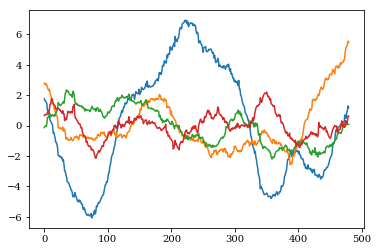

0.04100221519047286


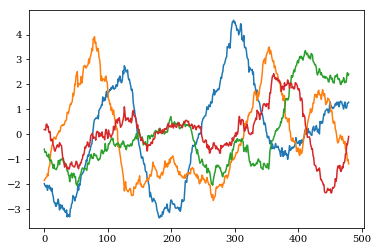

0.0330707578115734


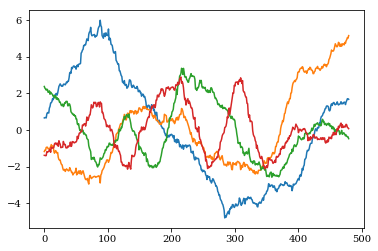

0.022810226585667143


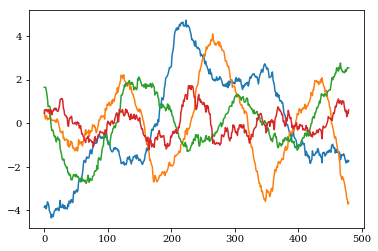

0.03569438378444292


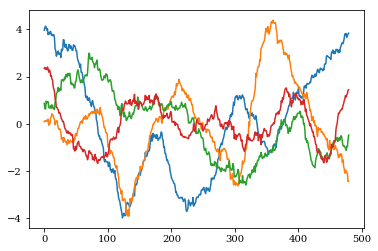

0.03017385553093662


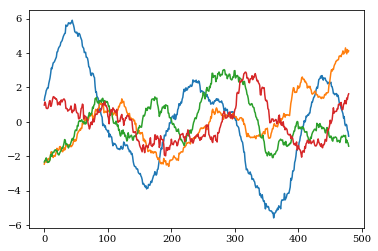

0.14950629748680783


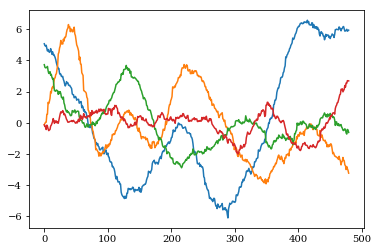

0.025913066190280745


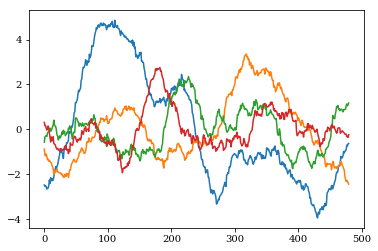

0.04654117746073238


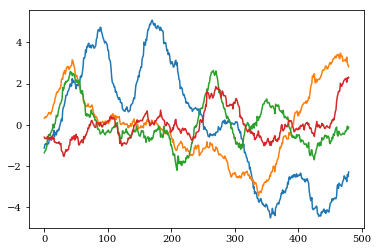

0.0316617561378384


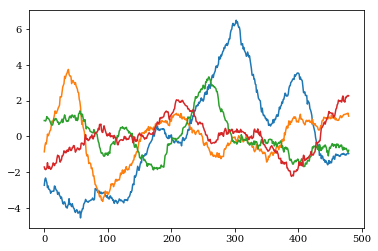

0.031450663736212484


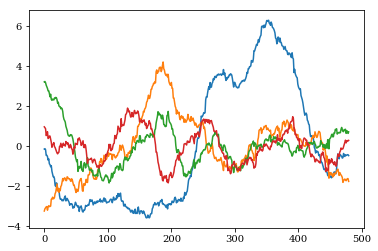

0.05287119410902114


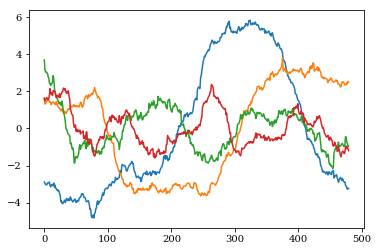

0.0810968410447075


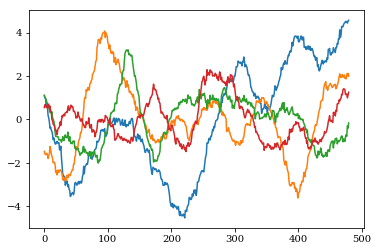

0.027952278424256766


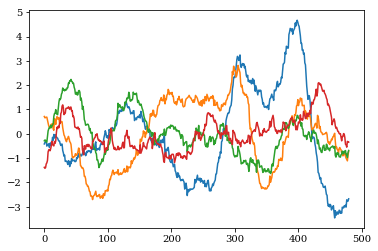

0.036494657772466826


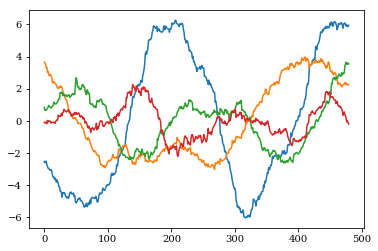

0.08108589783879912


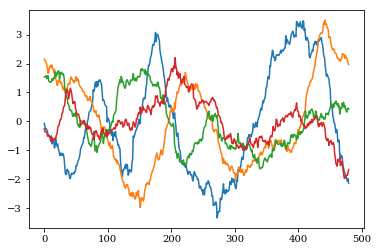

0.033680945209899664


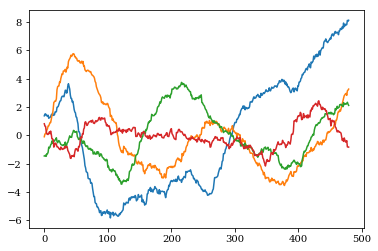

0.03486878109389362


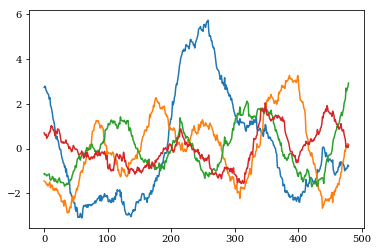

0.03204247080527178


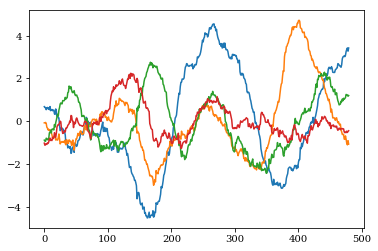

0.0357226111922772


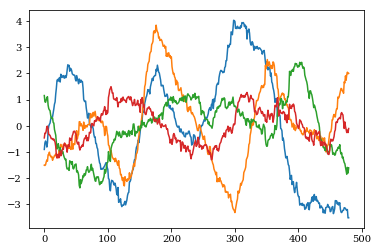

0.03938889627368225


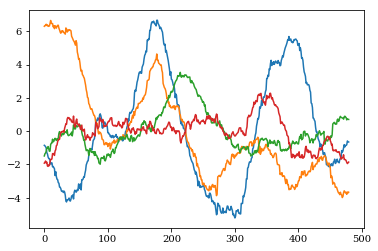

0.03038529884290098


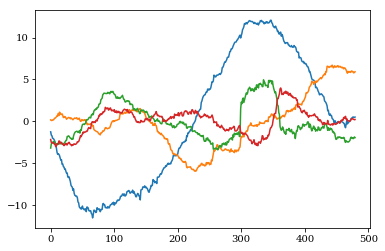

0.6882929131539518


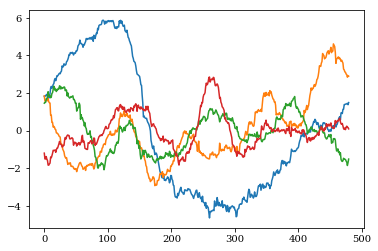

0.031802858820170136


In [15]:
piecewise_mse = np.zeros(50)
for i in range(50):
    X, Y, F = prepare_data(sim_data, 1, i)
    fitted_components, Y_hat = SW_PCA_VAR(X, Y, 20, 4)
    for j in range(4):
        plt.plot(fitted_components[:, j])
    plt.show()
    total = Y_hat.shape[0]
    start = 10
    mse = np.mean((Y[start:(start + total), :] - Y_hat) ** 2)
    piecewise_mse[i] = mse
    print(mse)

In [20]:
print(np.median(piecewise_mse))
print(np.mean(piecewise_mse))
print(np.std(piecewise_mse))

0.0338030016866467
0.0536149340391185
0.09311934858398813


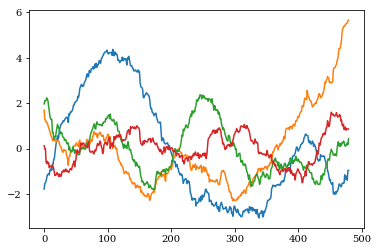

0.03524866587364211


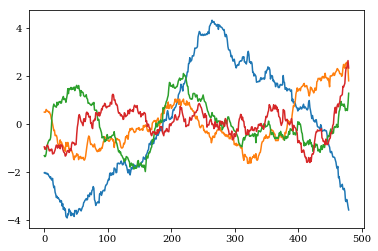

0.03780995939464061


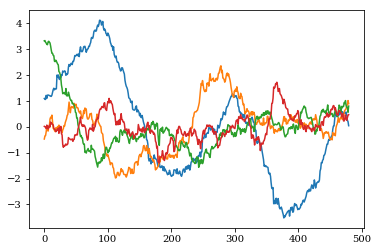

0.04126767537676617


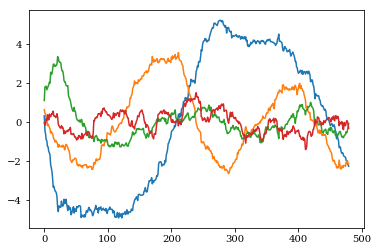

0.03391330207142062


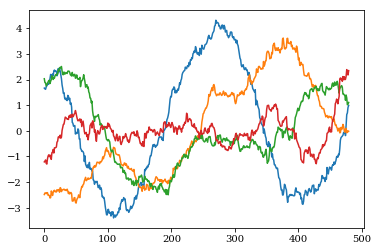

0.03226422474774887


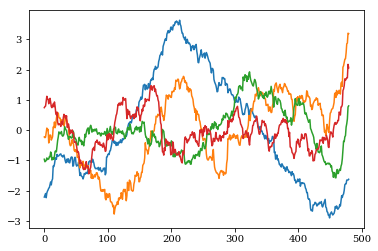

0.03826203683979784


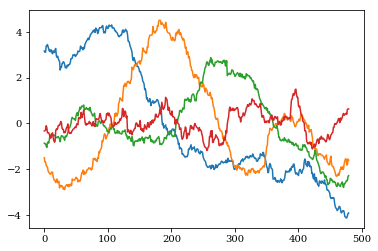

0.03824062897163001


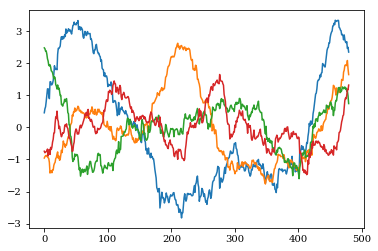

0.03497307964334546


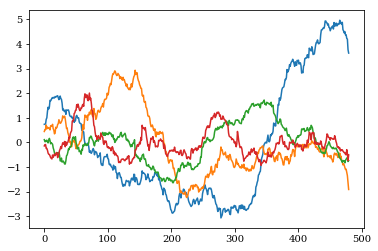

0.03383770389929984


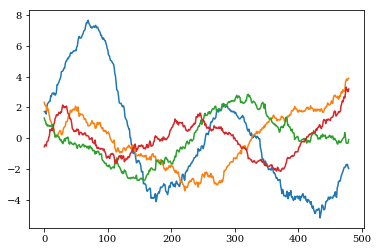

0.04486256150679539


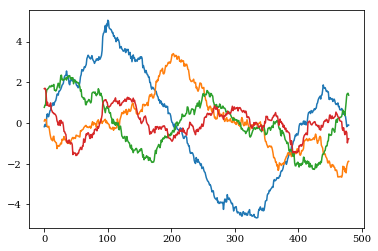

0.04658287532360707


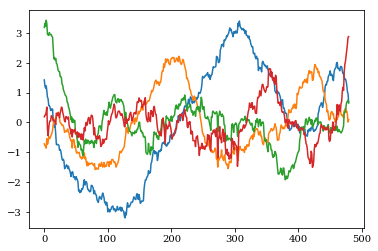

0.039096998334117436


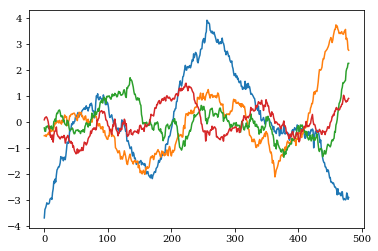

0.03213191082690725


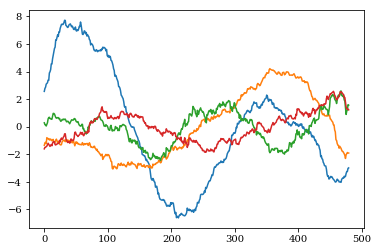

0.08387919281822764


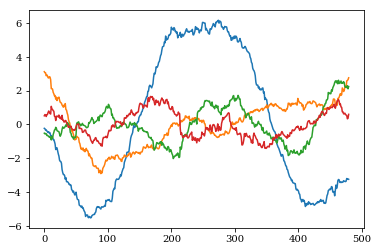

0.03192167838336722


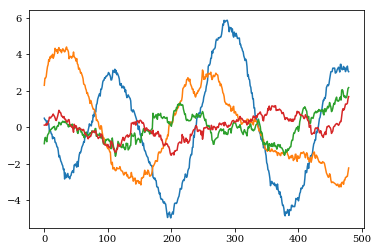

0.03530508107924299


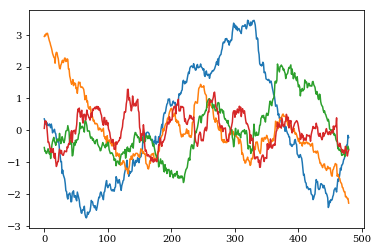

0.04289134304280453


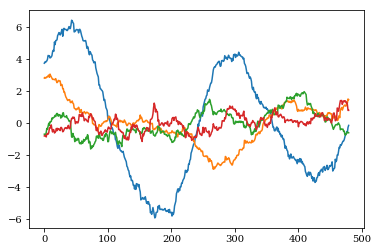

0.036674961463940906


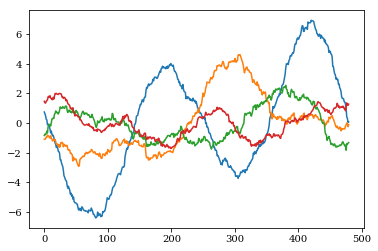

0.03747192991341959


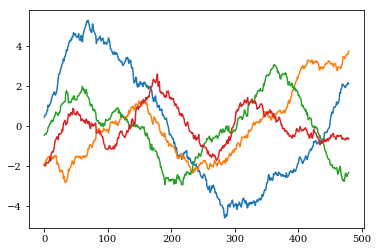

0.030789017402928946


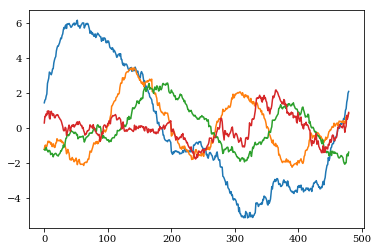

0.04896651528325732


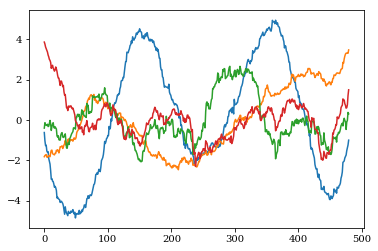

0.13068199314357262


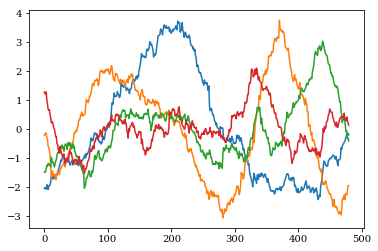

0.04164518694370928


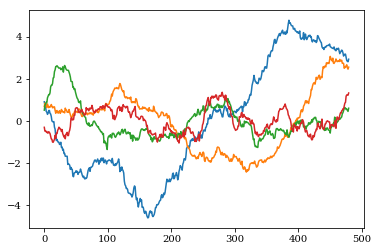

0.039033372214468225


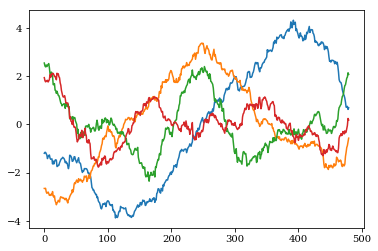

0.03285179742238907


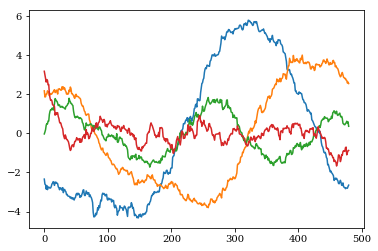

0.04101160108932498


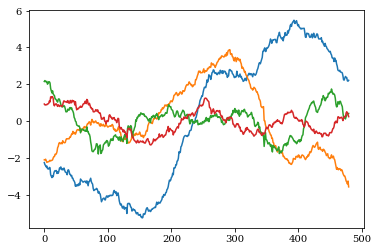

0.03508822590038898


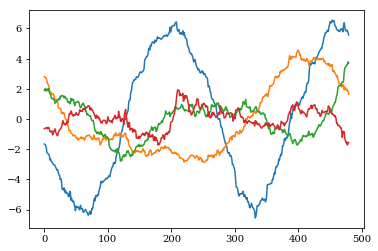

0.060876852544972354


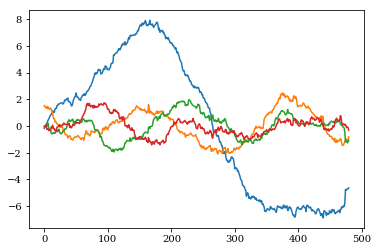

0.03442550747236377


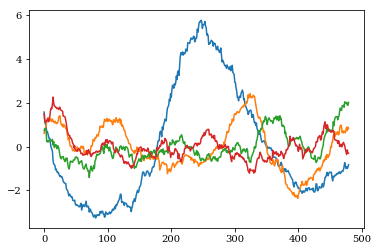

0.03968721515961951


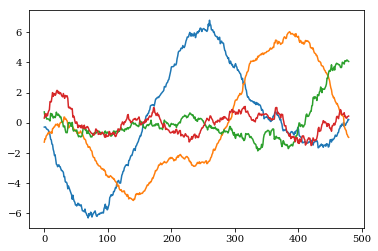

0.06645823271578546


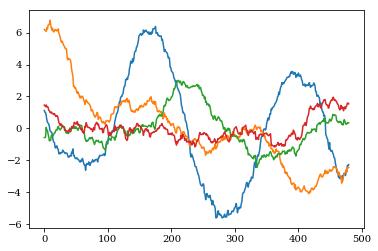

0.033661568809407454


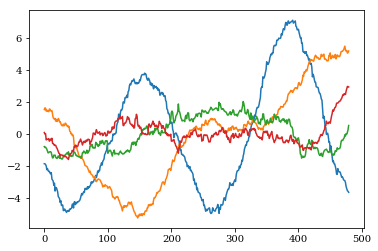

0.061253715677011586


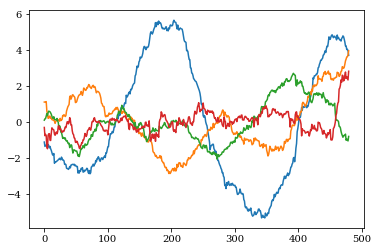

0.04431233755281002


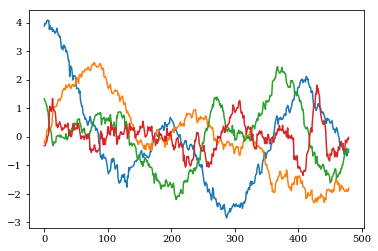

0.036136352831740375


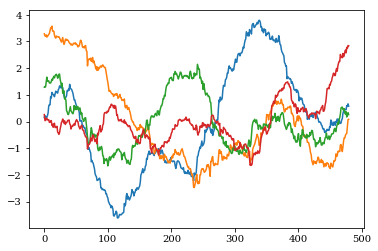

0.03221930854449892


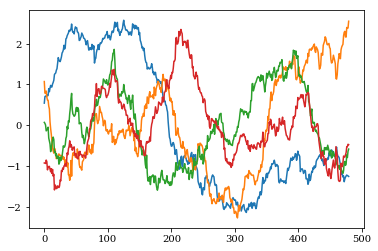

0.03446563131169311


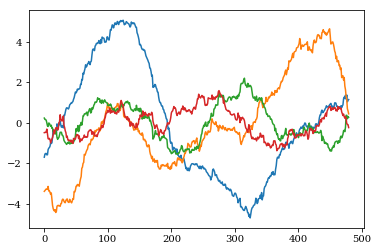

0.03548249431098446


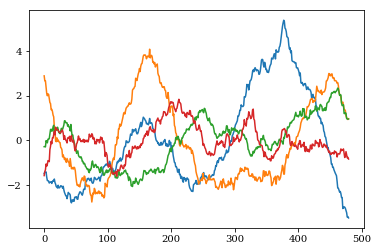

0.03814053841464863


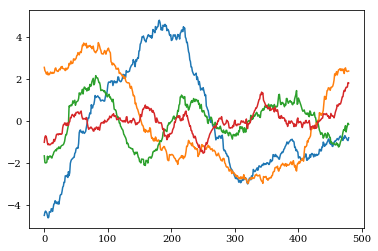

0.032841732077928946


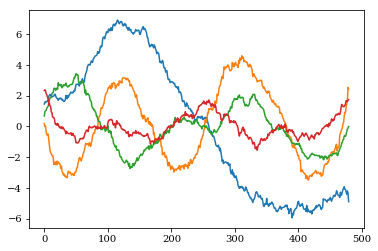

0.03167588624671833


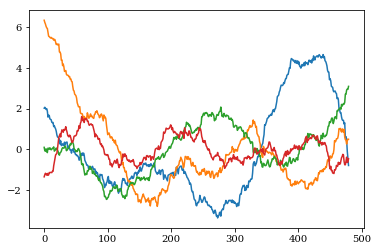

0.037278853363676624


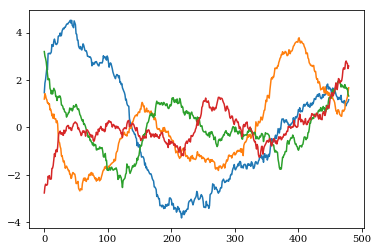

0.0320021399673483


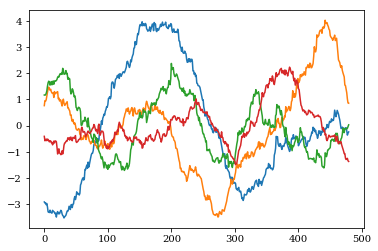

0.033503211044935526


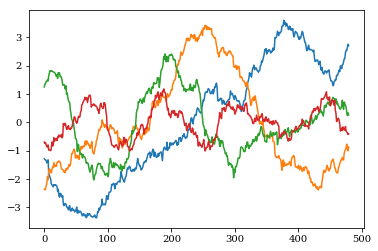

0.035460573755592854


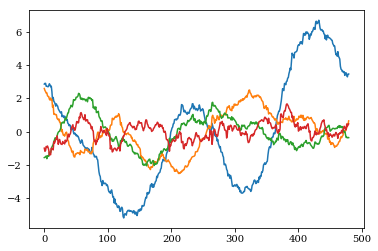

0.03986496683366795


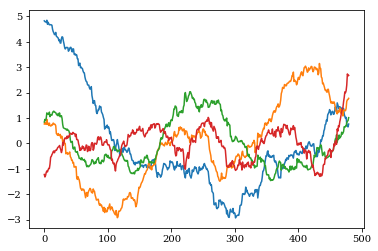

0.0328301243019903


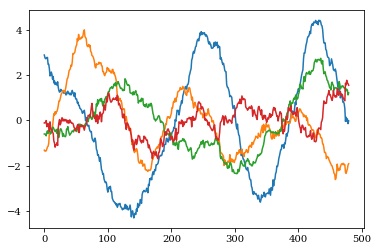

0.03804796141141768


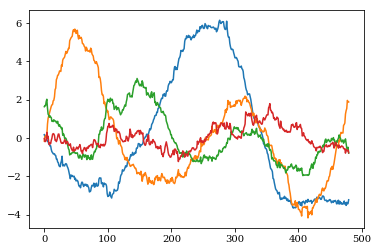

0.03645917846456825


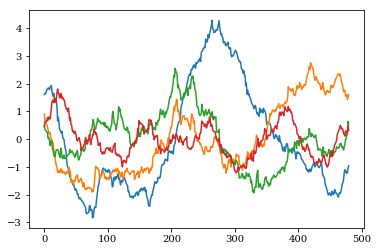

0.03725360758426293


In [17]:
spline_mse = np.zeros(50)
for i in range(50):
    X, Y, F = prepare_data(sim_data, 2, i)
    fitted_components, Y_hat = SW_PCA_VAR(X, Y, 20, 4)
    for j in range(4):
        plt.plot(fitted_components[:, j])
    plt.show()
    total = Y_hat.shape[0]
    start = 10
    mse = np.mean((Y[start:(start + total), :] - Y_hat) ** 2)
    spline_mse[i] = mse
    print(mse)

In [21]:
print(np.median(spline_mse))
print(np.mean(spline_mse))
print(np.std(spline_mse))

0.036964284524101915
0.041220830186168095
0.01605913546554027
